<a href="https://colab.research.google.com/github/venk221/SfM/blob/master/SfM_try1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import sys
from google.colab import drive
drive.mount('/content/gdrive')
import glob
import cv2
from google.colab.patches import cv2_imshow
import math 
import random
K = np.array([[531.122155322710, 0, 407.192550839899],[0, 531.541737503901, 313.308715048366],[0, 0 ,1]])

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [91]:
def mat(numMatches, cor, img2):
  img2 = float(img2)
  if numMatches == float(2):
    if cor[6] == img2:
      x_mat1 = cor[7]
      y_mat1 = cor[8]
      return np.array([x_mat1, y_mat1])
    else:
      return np.array([-1, -1])
  if numMatches == float(3):
    if cor[6] == img2:
      x_mat1 = cor[7]
      y_mat1 = cor[8]
      return np.array([x_mat1, y_mat1])
    elif cor[9] == img2:
      x_mat1 = cor[10]
      y_mat1 = cor[11]
      return np.array([x_mat1, y_mat1])
    else:
      return np.array([-1, -1])
  if numMatches == float(4):
    if cor[6] == img2:
      x_mat1 = cor[7]
      y_mat1 = cor[8]
      return np.array([x_mat1, y_mat1])
    elif cor[9] == img2:
      x_mat1 = cor[10]
      y_mat1 = cor[11]
      return np.array([x_mat1, y_mat1])
    elif cor[12] == img2:
      x_mat1 = cor[13]
      y_mat1 = cor[14]
      return np.array([x_mat1, y_mat1])
    else:
      return np.array([-1, -1])
  if numMatches == float(5):
    if cor[6] == img2:
      x_mat1 = cor[7]
      y_mat1 = cor[8]
      return np.array([x_mat1, y_mat1])
    elif cor[9] == img2:
      x_mat1 = cor[10]
      y_mat1 = cor[11]
      return np.array([x_mat1, y_mat1])
    elif cor[12] == img2:
      x_mat1 = cor[13]
      y_mat1 = cor[14]
      return np.array([x_mat1, y_mat1])
    elif cor[15] == img2:
      x_mat1 = cor[16]
      y_mat1 = cor[17]
      return np.array([x_mat1, y_mat1])
    else:
      return np.array([-1, -1])
  if numMatches > float(6):
    print('olala')

def findMatches(img1, img2):
  with open('/content/gdrive/MyDrive/Colab Notebooks/P3Data/'+ 'matching' + str(img1) + '.txt') as f:
      Prev_contents = f.readlines()       
      nfeat = len(Prev_contents) - 1
      # print(f"number of features in matching{img1}.txt are {nfeat}")
      # print(Prev_contents)
      contents = []
      for k,line in enumerate(Prev_contents):
        if k != 0:
          # contents = [float(i) for i in line]
          line = line.rstrip('\n')
          line_elements = line.split()
          corners = [float(j) for j in line_elements]
          # print(type(cor[random.randint(1,6)]))
          contents.append(corners)
      # print(contents)
      RGB_vals = []
      coordinates = []
      matchingCoor = []
      for k,line in enumerate(contents):
        # if k == 963:  
          cor = np.array(line)
          numMatches = cor[0]
          r = cor[1]
          g = cor[2]
          b = cor[3]
          x_cor = cor[4]
          y_cor = cor[5]
          img_id1 = cor[6]
          matching_cor = mat(numMatches, cor, img2)
          # print(type(matching_cor))
          # print(matching_cor)
          RGB_vals.append([r,g,b])
          coordinates.append([x_cor, y_cor])
          # if matching_cor != None:
          matchingCoor.append(matching_cor)
      matchingCoor = np.array(matchingCoor)
      # matchingCoor[matchingCoor==-1]=[-1,-1]
      # print(matchingCoor)
      matchingCoor = np.reshape(matchingCoor, (nfeat,2))
      RGB_vals = np.array(RGB_vals)
      coordinates = np.array(coordinates)
      firstcol = img1*np.ones((nfeat,1))
      fourthcol = img2*np.ones((nfeat,1))
      # print(f"firstcol={firstcol.shape}, RGB_vals={RGB_vals.shape}, coordinates={coordinates.shape},fourthcol={fourthcol.shape}, matchingCoor={matchingCoor.shape}")
      InfoAll = np.append(firstcol, RGB_vals,  axis = 1)
      InfoAll = np.append(InfoAll, coordinates,  axis = 1)
      InfoAll = np.append(InfoAll, fourthcol,  axis = 1)
      InfoAll = np.append(InfoAll, matchingCoor,  axis = 1)
      # print(InfoAll.shape)
      # print((matchingCoor.shape[0]))
      count = 0
      for k,j in enumerate((matchingCoor)):
        if j[0] == -1:
          count = count+1
      # print(count)
      # print(InfoAll)
      newinfo = []
      for row in InfoAll:
        if row[7] != -1:
          newinfo.append(row)
      newinfo = np.array(newinfo) 
      # print(newinfo.shape)
      return newinfo

matches1and2 = findMatches(1,2)

"""Please check if the arguments of this function has no [-1,-1] in them.
i.e. they have matches between x and y"""
# def EstimateFundamentalMatrix(a, b):
  # # print(np.sum(a[:,0]))
  # n = a.shape[0]
  # # print(a,b)
  # """Normalization - Eight Point Algorithm"""
  # #Calculating means
  # ua = (1/n)*(np.sum(a[:,0]))
  # va = (1/n)*(np.sum(a[:,1]))
  # ub = (1/n)*(np.sum(b[:,0]))
  # vb = (1/n)*(np.sum(b[:,1]))
  # ua_dash, va_dash = a[:,0] - ua, a[:,1] - va
  # ub_dash, vb_dash = b[:,0] - ub, b[:,1] - vb 
  # #Finding scale = https://en.wikipedia.org/wiki/Eight-point_algorithm#:~:text=The%20eight%2Dpoint%20algorithm%20is,case%20of%20the%20essential%20matrix.
  # sa = n / np.sum(((ua_dash)**2 + (va_dash)**2)**(0.5))  #(2**(0.5))/(((1/n)*(np.mean((ua_dash**2)+(va_dash**2))))**(0.5))
  # sb = n / np.sum(((ub_dash)**2 + (vb_dash)**2)**(0.5))  #(2**(0.5))/(((1/n)*(np.mean((ub_dash**2)+(vb_dash**2))))**(0.5)) 
  # scaleA = np.array([[sa, 0, 0],[0, sa, 0],[0, 0, 1]])
  # scaleB = np.array([[sb, 0, 0],[0, sb, 0],[0, 0, 1]])
  # translationA = np.array([[1, 0, -ua],[0, 1, -va],[0, 0 , 1]])
  # translationB = np.array([[1, 0, -ub],[0, 1, -vb],[0, 0 , 1]])
  # transformation_A_2D = np.matmul(scaleA, translationA)
  # transformation_B_2D = np.matmul(scaleB, translationB) 
  # aPrev = np.column_stack((a, np.ones(len(a))))
  # bPrev = np.column_stack((b, np.ones(len(b))))
  # a_normalized = np.matmul(transformation_A_2D, aPrev.transpose())
  # b_normalized = np.matmul(transformation_B_2D, bPrev.transpose())
  # anew, bnew = a_normalized.transpose(), b_normalized.transpose()
  # A = []
  # for i in range(0, anew.shape[0]): #anew.shape[0]
  #   x1, y1 = anew[i,0], anew[i,1]
  #   x2, y2 = bnew[i,0], bnew[i,1]
  #   A.append([x1*x2, y2*x1, x1, x2*y1, y1*y2, y1, x2, y2, 1]) #[x1*x2, y1*x2, x2, x1*y2, y1*y2, y2, x1, y1, 1]
  # A = np.array(A)
  # _, s, v = np.linalg.svd(A, full_matrices=True)
  # v = v.transpose()
  # F = v[:,-1]
  # F = np.reshape(F, (3, 3))
  # """SVD Cleanup"""
  # F = np.dot(transformation_B_2D.transpose(), np.dot(F, transformation_A_2D))
  # u, s1, vt = np.linalg.svd(F)
  # s = np.diag(s1)
  # s[2,2] = 0
  # F = np.dot(u, np.dot(s, vt))
  # F = F/F[2,2]
  # return F

def EstimateFundamentalMatrix(a, b):
  # print(np.sum(a[:,0]))
  n = a.shape[0]
  # print(a,b)
  """Normalization - Eight Point Algorithm"""
  #Calculating means
  ua = (1/n)*(np.sum(a[:,0]))
  va = (1/n)*(np.sum(a[:,1]))
  ub = (1/n)*(np.sum(b[:,0]))
  vb = (1/n)*(np.sum(b[:,1]))
  ua_dash, va_dash = a[:,0] - ua, a[:,1] - va
  ub_dash, vb_dash = b[:,0] - ub, b[:,1] - vb 
  #Finding scale = https://en.wikipedia.org/wiki/Eight-point_algorithm#:~:text=The%20eight%2Dpoint%20algorithm%20is,case%20of%20the%20essential%20matrix.
  sa = n / np.sum(((ua_dash)**2 + (va_dash)**2)**(0.5))  #(2**(0.5))/(((1/n)*(np.mean((ua_dash**2)+(va_dash**2))))**(0.5))
  sb = n / np.sum(((ub_dash)**2 + (vb_dash)**2)**(0.5))  #(2**(0.5))/(((1/n)*(np.mean((ub_dash**2)+(vb_dash**2))))**(0.5)) 
  scaleA = np.array([[sa, 0, 0],[0, sa, 0],[0, 0, 1]])
  scaleB = np.array([[sb, 0, 0],[0, sb, 0],[0, 0, 1]])
  translationA = np.array([[1, 0, -ua],[0, 1, -va],[0, 0 , 1]])
  translationB = np.array([[1, 0, -ub],[0, 1, -vb],[0, 0 , 1]])
  transformation_A_2D = np.matmul(scaleA, translationA)
  transformation_B_2D = np.matmul(scaleB, translationB) 
  aPrev = np.column_stack((a, np.ones(len(a))))
  bPrev = np.column_stack((b, np.ones(len(b))))
  a_normalized = np.matmul(transformation_A_2D, aPrev.transpose())
  b_normalized = np.matmul(transformation_B_2D, bPrev.transpose())
  anew, bnew = a_normalized.transpose(), b_normalized.transpose()
  A = []
  for i in range(0, anew.shape[0]): #anew.shape[0]
    x1, y1 = anew[i,0], anew[i,1]
    x2, y2 = bnew[i,0], bnew[i,1]
    A.append([x1*x2, y1*x2, x2, x1*y2, y1*y2, y2, x1, y1, 1])  #[x1*x2, y2*x1, x1, x2*y1, y1*y2, y1, x2, y2, 1]
  A = np.array(A)
  _, s, v = np.linalg.svd(A, full_matrices=True)
  v = v.transpose()
  F = v[:,-1]
  F = np.reshape(F, (3, 3))
  """SVD Cleanup"""
  F = np.dot(transformation_B_2D.transpose(), np.dot(F, transformation_A_2D))
  u, s1, vt = np.linalg.svd(F)
  s = np.diag(s1)
  s[2,2] = 0
  F = np.dot(u, np.dot(s, vt))
  F = F/F[2,2]
  return F

# F = EstimateFundamentalMatrix(matches1and2[:,4:6], matches1and2[:,7:9])  

def error(x1,x2,f):
  x1 = np.append(x1,1) #np.reshape(x1,(1,2))
  x1 = np.reshape(x1,(3,1))
  x2 = np.append(x2,1)
  x2 = np.reshape(x2, (1,3))
  # print(f"bhok = {x1, x1.shape}, x2={x2, x2.shape}, f={f.shape}")
  err = np.dot(x2, np.dot(f, x1))
  return np.abs(err)
  
def GetInlierRANSANC(a,b):
  num_inliers = 0
  iterations = 1000
  threshold = 0.003
  ffinal = 0
  final_inliers = []
  # print(a[0,:].shape)
  for i in range(iterations):
      indices = []  
    # if i == 99:
      for i in range(0, 8):
        indices.append(random.randint(0, 8))
      x1 = a[indices,:]
      x2 = b[indices,:]
      ftemp = EstimateFundamentalMatrix(x1,x2)
      inliers = []
      if (len(a) > 8) and (len(b) > 8):
        for j in range(len(a)):
          # if j == 1:
          err = error(a[j,:], b[j,:], ftemp)
          # print(err)
          if err < threshold:
                  # print("kaka")
                  inliers.append([j])
                  # print(inliers))
          if len(inliers) > num_inliers:
              num_inliers = len(inliers)
              final_inliers = inliers
  ffinal = ftemp
  print("final",ffinal, "no of inliers", num_inliers)
  return ffinal, final_inliers

bestF, inliers = GetInlierRANSANC(matches1and2[:,4:6], matches1and2[:,7:9])

def EssentialMatrixFromFundamentalMatrix(F, K):
  E = np.dot(K.T, np.dot(F, K))
  u, s, vt = np.linalg.svd(E)
  E = np.dot(u, np.dot(np.diag([1, 1, 0]), vt))
  return E

E = EssentialMatrixFromFundamentalMatrix(bestF, K)
print(E)

final [[ 7.54530680e-06  2.22398278e-06 -9.92554472e-04]
 [-2.42025731e-07  2.65323884e-06 -7.54270446e-04]
 [-8.78084469e-03 -2.05065003e-03  1.00000000e+00]] no of inliers 28
[[ 0.43094597  0.45445357  0.31384849]
 [-0.09508455  0.86883282 -0.02406221]
 [-0.70006286  0.19265474 -0.4664357 ]]


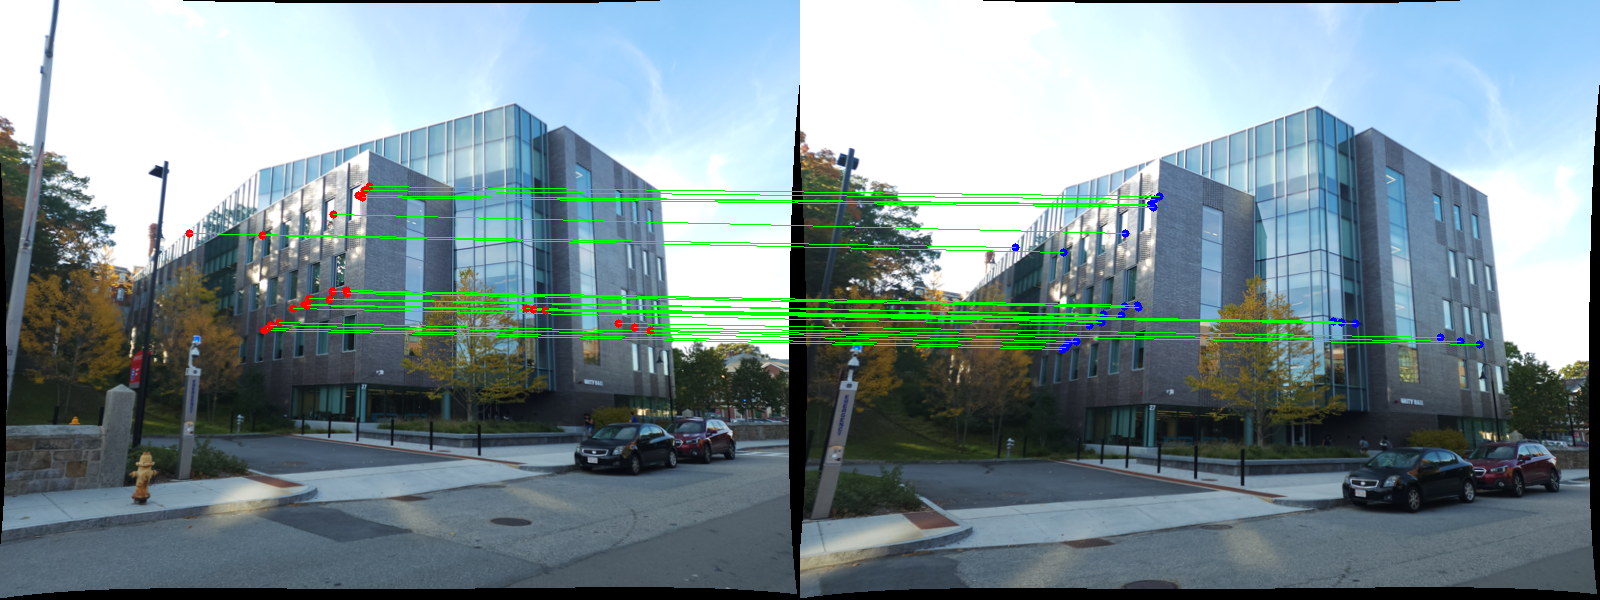

In [92]:
inliers = np.array(inliers)
inliers1and2 = matches1and2[inliers]
# print(inliers1and2.shape)
inliers1and2 = np.reshape(inliers1and2, (inliers1and2.shape[0],9))
# print(inliers1and2.shape)
# print(inliers1and2[:,4:6])

def DrawCorrespondence(i, j, inliers_a, inliers_b):
    img1 = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/P3Data/' + str(i) + '.png')
    img2 = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/P3Data/' + str(j) + '.png')

    rows1, cols1 = img1.shape[:2]
    rows2, cols2 = img2.shape[:2]
    out = np.zeros((max([rows1, rows2]), cols1 + cols2, 3), dtype='uint8')
    out[:rows1, :cols1, :] = img1
    out[:rows2, cols1:cols1 + cols2, :] = img2
    radius = 4
    BLUE = (255, 0, 0)
    GREEN = (0, 255, 0)
    RED = (0, 0, 255)
    thickness = 1
    # print(f"testing = {inliers_a}")
    assert len(inliers_a) == len(inliers_b), "inliers in images not equal"
    for m in range(0, len(inliers_a)):

        cv2.circle(out, (int(inliers_a[m,0]), int(inliers_a[m,1])), radius,
                   RED, -1)

        cv2.circle(out, (int(inliers_b[m][0]) + cols1, int(inliers_b[m][1])),
                   radius, BLUE, -1)
        
        cv2.line(out, (int(inliers_a[m][0]), int(inliers_a[m][1])),
                 (int(inliers_b[m][0]) + cols1, int(inliers_b[m][1])), GREEN,
                 thickness)
    cv2_imshow(out)

DrawCorrespondence(1, 2, inliers1and2[:,4:6], inliers1and2[:,7:9])

In [105]:
matches1and2 = findMatches(1,2)
matches1and3 = findMatches(1,3)
matches1and4 = findMatches(1,4)
matches1and5 = findMatches(1,5)
matches2and3 = findMatches(2,3)
matches2and4 = findMatches(2,4)
matches2and5 = findMatches(2,5)
matches3and4 = findMatches(3,4)
matches3and5 = findMatches(3,5)
# print(matches1and2)

In [93]:
"""DO not Delete"""
# file = open('/content/gdrive/MyDrive/Colab Notebooks/P3Data/'+ 'matching' + str(1) + '.txt')

# feature_list = []
# for pos, l_num in enumerate(file):
#    if pos!=0:
#       split_line = list(l_num.split())
#       temp_dict = {"rgb_value":[split_line[1:4]], "self_img_point":split_line[4:6]}
#       x = 6
#       while x<len(split_line):
#           temp_dict[str(split_line[x])] = split_line[x+1:x+3]
#           x+=3
#       feature_list.append(temp_dict)
# print(feature_list)
# image_2 = []
# image_3 = []
# image_4 = []
# image_5 = []
# for item in feature_list:
 
#   if str(2) in item:
#     temp_dict_2 = {"rgb_value":item["rgb_value"], "self_img_point":item["self_img_point"]}
#     temp_dict_2["image_2_match_point"] = item[str(2)]
#     image_2.append(temp_dict_2)

#   if str(3) in item:
#      temp_dict_3 = {"rgb_value":item["rgb_value"], "self_img_point":item["self_img_point"]}
#      temp_dict_3["image_3_match_point"] = item[str(3)]
#      image_3.append(temp_dict_3)

#   if str(4) in item:
#     temp_dict_4 = {"rgb_value":item["rgb_value"], "self_img_point":item["self_img_point"]}
#     temp_dict_4["image_4_match_point"] = item[str(4)]
#     image_4.append(temp_dict_4)

#   if str(5) in item:
#     temp_dict_5 = {"rgb_value":item["rgb_value"], "self_img_point":item["self_img_point"]}
#     temp_dict_5["image_5_match_point"] = item[str(5)]
#     image_5.append(temp_dict_5)

"""C"""
# # x=matches1and2[:,7:9]
# # y=matches1and2[:,4:6]
# # print(x,y)
# # xnew = []
# # for row in x:
# #   if row[0] != -1:
# #     xnew.append(row)
# # xnew = np.array(xnew)
# # print(xnew.shape)

# def matches_check(x,y):
#   xnew = []
#   ynew = []
#   # if x.shape[1] == 8:
#   #   for row in x:
#   #     if x[7] != -1:
#   #       xnew.append(row)
#   #   xnew = np.array(xnew)
#   #   for row in x:
#   #     if y[7] != -1:
#   #       xnew.append(row)
#   #   xnew = np.array(ynew)


'C'